## 1. Import Libraries

In [136]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 

## 2. Load Data

In [137]:
df = pd.read_csv("Data_OptimalVehiclePricing.csv")

## 3. Understanding the data

In [138]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [139]:
df.describe()  

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [140]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [141]:
num_col = df.select_dtypes(include=np.number).columns           #numerical variables
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns           #categorical variables
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Categorical columns: 
 Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


## 4. Data Pre-processing

In [142]:
df.drop(['make'],axis=1,inplace=True)

cat = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

df = pd.get_dummies(df,cat,drop_first=True)


## 5. Exploratory Data Analysis

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


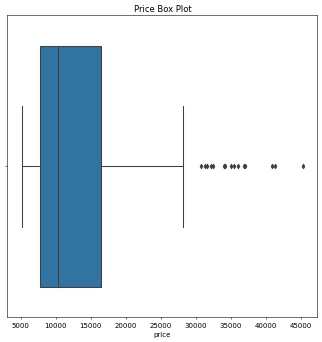

In [143]:
# Let's check the distribution of y variable
plt.figure(figsize=(8,8), dpi= 50)
sns.boxplot(df['price'])
plt.title('Price Box Plot')
plt.show()

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Price Distribution Plot'}, xlabel='price', ylabel='Density'>

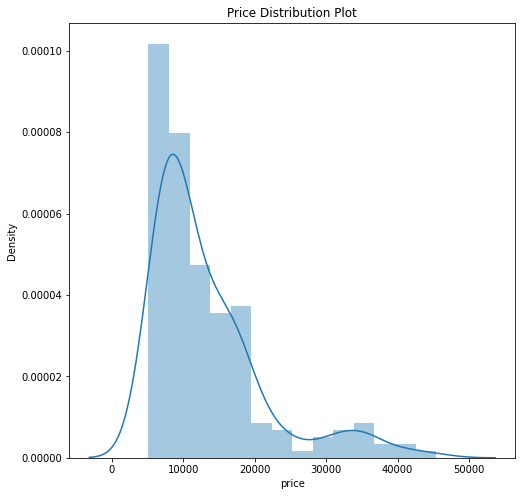

In [144]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['price'])

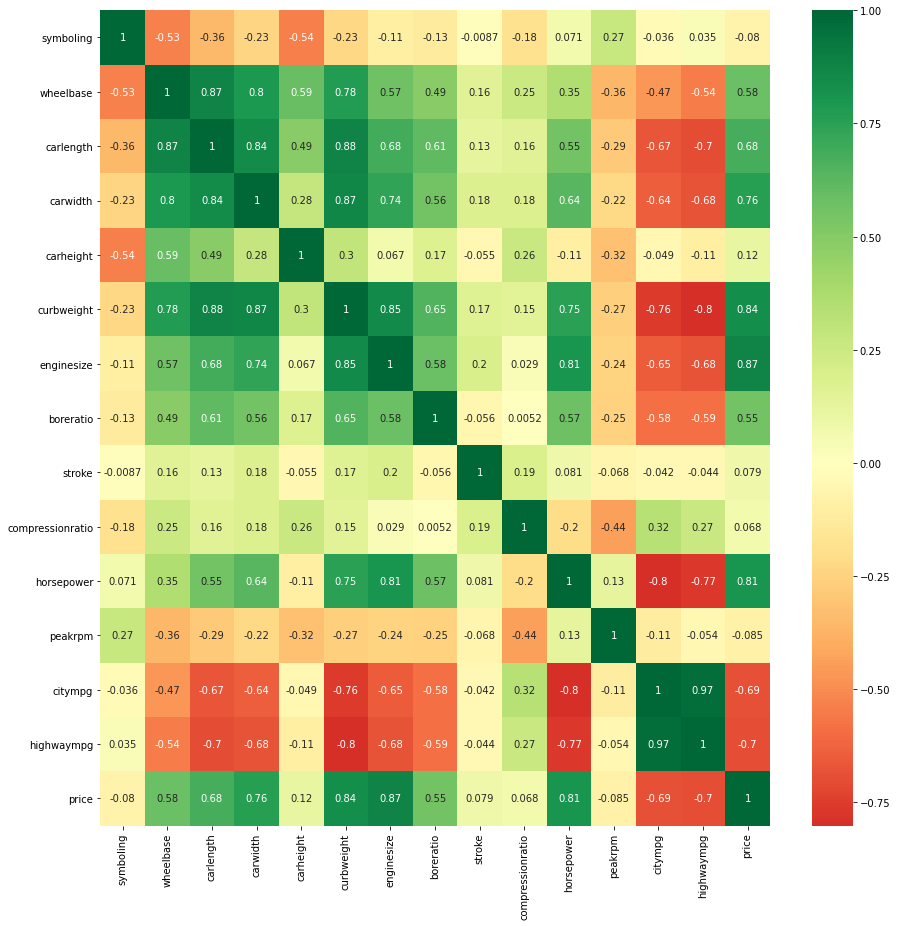

In [145]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

## 6. Model Building

In [146]:
# Train test split
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

In [147]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Gradient Boosting Regression

- learning_rate = 0.05

In [148]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9004401736606921
MAPE     :  11.26429492783448


**Summary :**

MAPE is quite higher, so let's try to tune the parameter again

## Gradient Boosting Regression

- learning_rate = 0.1

In [149]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9053242536929086
MAPE     :  10.656175859663653


**Summary :**

MAPE has improved as compared to the earlier model, let's try to tune the parameter using gridsearch

## Grid Search


In [150]:
gbr = GradientBoostingRegressor(random_state = 100)

# defining parameter range 
param_grid={'n_estimators':[100,500,1000], 
            'learning_rate': [0.2,0.15, 0.1],
            'max_depth':[2,3,4,6], 
            'min_samples_leaf':[1,3,5]}   
  
grid = GridSearchCV(gbr, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_)
  
# Moel Parameters 
print(grid.best_estimator_)

{'learning_rate': 0.15, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 100}
GradientBoostingRegressor(learning_rate=0.15, min_samples_leaf=3,
                          random_state=100)


In [ ]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
print("r2 score : ",r2_score(y_test,grid_predictions))
print("MAPE     : ",mean_absolute_percentage_error(y_test,grid_predictions))

r2 score :  0.9042822591540534
MAPE     :  10.444374115383104


In [ ]:
import pickle

In [ ]:
pickle.dump(gbr, open('optimalvehiclepricing.pkl','wb'))

In [ ]:
model = pickle.load(open('optimalvehiclepricing.pkl','rb'))